In [1]:
import ast

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from glob import glob

from commons.utils import calculate_tfidf

In [2]:
# TARGET_FEATURE = "TF-IDF given the whole Title"
TARGET_FEATURE = "TF-IDF given the whole Abstract"
THRESHOLD_TF_IDF = 0.2

## Load csv Files

In [3]:
glob_path = "../tools/*.csv"

dfs = {}
for path in glob(glob_path):
    year = path.split('/')[-1].split('.csv')[0].split('_')[-1]
    dfs[year] = pd.read_csv(path)


## Prepare materials

In [4]:
string_set_year = dict()
string_list_year = dict()
string_counter_year = dict()

# 딕셔너리를 순회하며 각 문자열을 분리하고 집합에 추가하며 빈도를 계산
for key, value in dfs.items():
    string_set = set()
    string_list = list()
    string_counter = Counter()
    for string in value[TARGET_FEATURE]:
        items = [k for k, v in ast.literal_eval(string).items() if v > THRESHOLD_TF_IDF]
        for item in items:
            string_set.add(item)
            string_list.append(item)
            string_counter[item] += 1
    string_set_year[key] = string_set
    string_list_year[key] = string_list
    string_counter_year[key] = string_counter

## plot topK most common elements

In [5]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{:.1f}%\n({:d})'.format(pct, val)
    return my_autopct

year:2018, unique/total: 2464/4395
year:2019, unique/total: 3055/6161
year:2020, unique/total: 3801/8219
year:2021, unique/total: 4463/10105
year:2022, unique/total: 5395/12400
year:2023, unique/total: 6402/15301


/tmp/ipykernel_25590/781072253.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Blues_r')(np.linspace(0.2, 1, len(labels)))


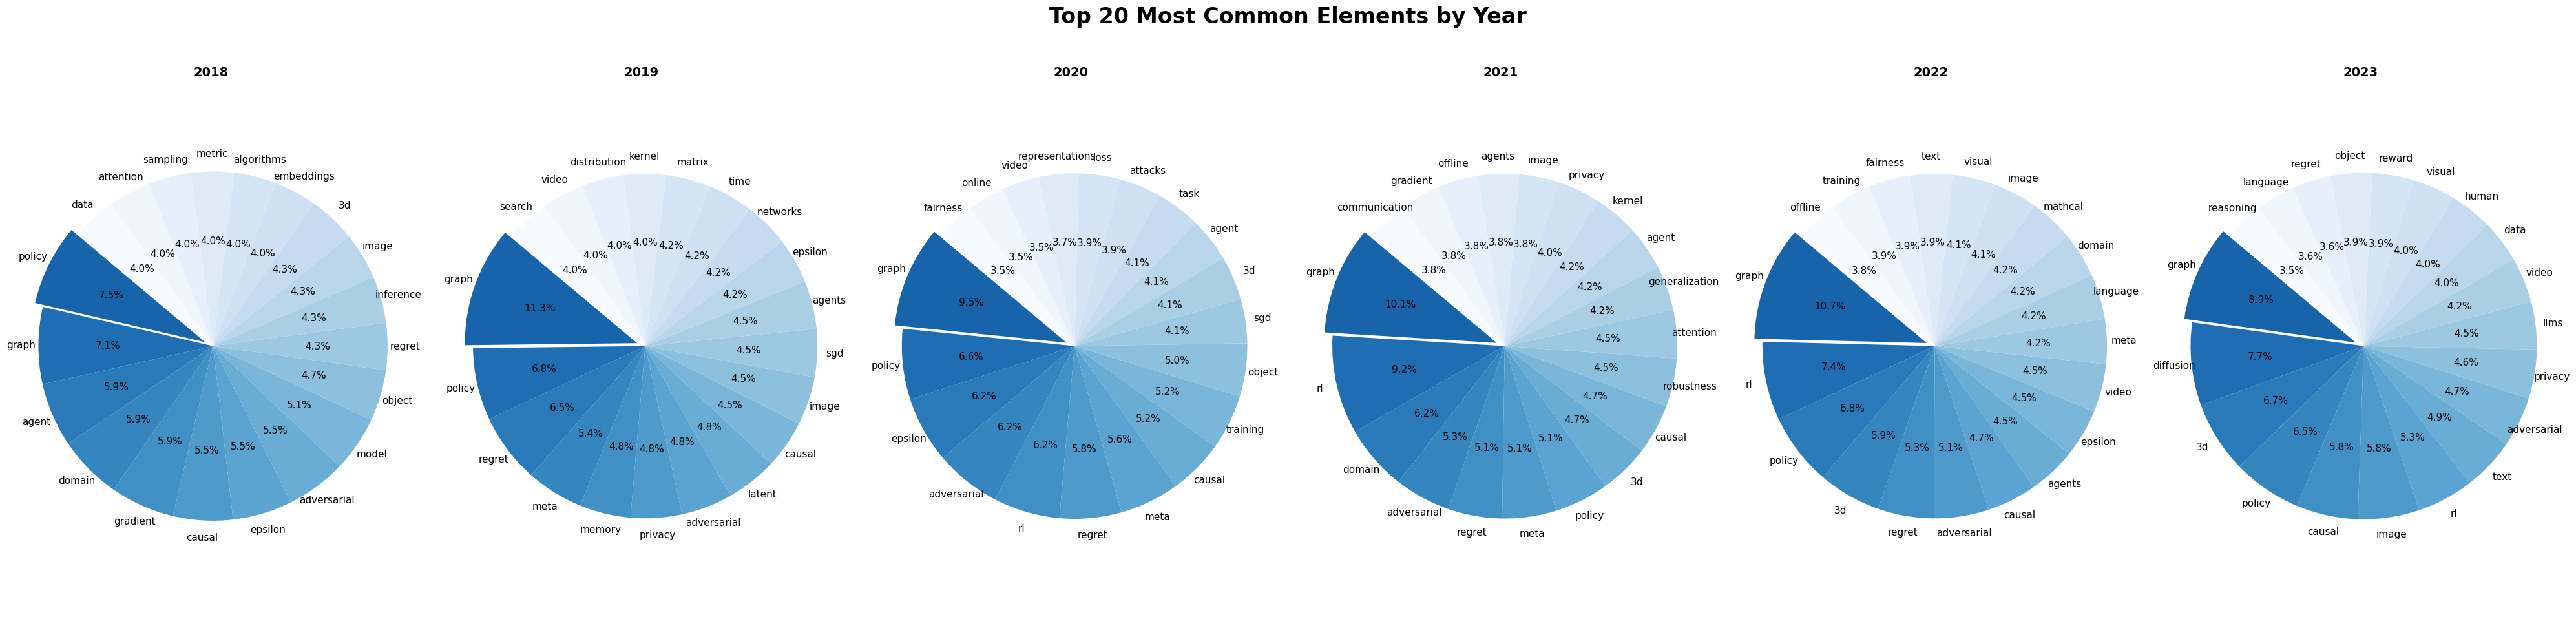

In [6]:
# 가장 많이 등장한 문자열 top k와 파이 그래프 생성
k = 20  # 원하는 상위 k개
num_years = len(string_counter_year)
fig, axs = plt.subplots(1, num_years, figsize=(40, 10))  # 1행 num_years열의 서브플롯 생성

for i, (year, string_counter) in enumerate(string_counter_year.items()):
    # 전체 문자열 요소 개수
    total_elements = sum(string_counter.values())
    # 유일한 문자열 요소 개수
    unique_elements = len(string_set_year[year])

    print(f"year:{year}, unique/total: {unique_elements}/{total_elements}")
    # 가장 많이 등장한 문자열 top k
    most_common_elements = string_counter.most_common(k)

    # 파이 그래프 생성
    labels, sizes = zip(*most_common_elements)
    # 색상 gradation 생성
    # colors = plt.cm.Blues(np.linspace(0, 1, len(labels)))[::-1]
    colors = plt.cm.get_cmap('Blues_r')(np.linspace(0.2, 1, len(labels)))
    explode = [0.05 if i == 0 else 0 for i in range(len(labels))]  # 첫 번째 조각만 돌출
    
    wedges, texts, autotexts = axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=False)
    
    # 레이블을 그래프 밖으로 빼기
    for text in texts:
        text.set_fontsize(11)
        text.set_rotation_mode('anchor')
        text.set_horizontalalignment('center')
        text.set_verticalalignment('center')
    for autotext in autotexts:
        autotext.set_fontsize(11)
        autotext.set_color('black')

    axs[i].set_title(f"{year}", fontsize=14, fontweight='bold')
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# 전체 제목 설정
plt.suptitle(f"Top {k} Most Common Elements by Year", fontsize=24, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 레이아웃 조정

# 그래프 저장 및 출력
plt.savefig(f"top_{k}_most_common_elements.jpg", dpi=300, bbox_inches='tight')
plt.show()

#### 추출한 연도별 키워드에 대해서 tf-idf를 계산하고 출력

In [10]:
# Convert keys to a list
keys_list = list(string_list_year.keys())
print(keys_list)  # Output: ['a', 'b', 'c']

# Convert each set to a space-separated string and create a list
values_list = [' '.join(list(v)) for k, v in string_list_year.items()]
print(values_list)  # Output: [1, 2, 3]


word_tfidf_abstracts = calculate_tfidf(values_list)

TOP_K = 50
key_words_dict = dict()
for key, tfidf_dict in zip(keys_list, word_tfidf_abstracts):
    key_words = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:TOP_K]
    key_words = {word: score for word, score in key_words if score >= 0.02}
    key_words_dict[key] = key_words

['2018', '2019', '2020', '2021', '2022', '2023']
['embeddings composing environment meta rule audio 360 spatial video mono viewing gmms gans images bin style styles subtask agent nsgs mcts graph classifier teacher game distribution distillation player contours contour locates regret benchmark derive dt hinge mistake ramp realizability gcns layer expansion integrals regression elastic lasso double causal iid inferences articles assignments branching survey solvers marginal robust adversarially features leveraged spectral dataset dr precision maps measure technical amalgamates delicately ensuing richness supplement resnet dimension sample cnns epsilon filter complexity convolutional fnn dimensional couplings screening spike nuisance factors invariance initialisation noise propagation signal parameters sensitivity challenges sparsity zero independence conn structure slda cooperative rl gamma generalization delta error decentralized devices communication likelihood dlvms imputation filteri

/tmp/ipykernel_25590/1643727650.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Blues_r')(np.linspace(0.2, 1, len(labels)))


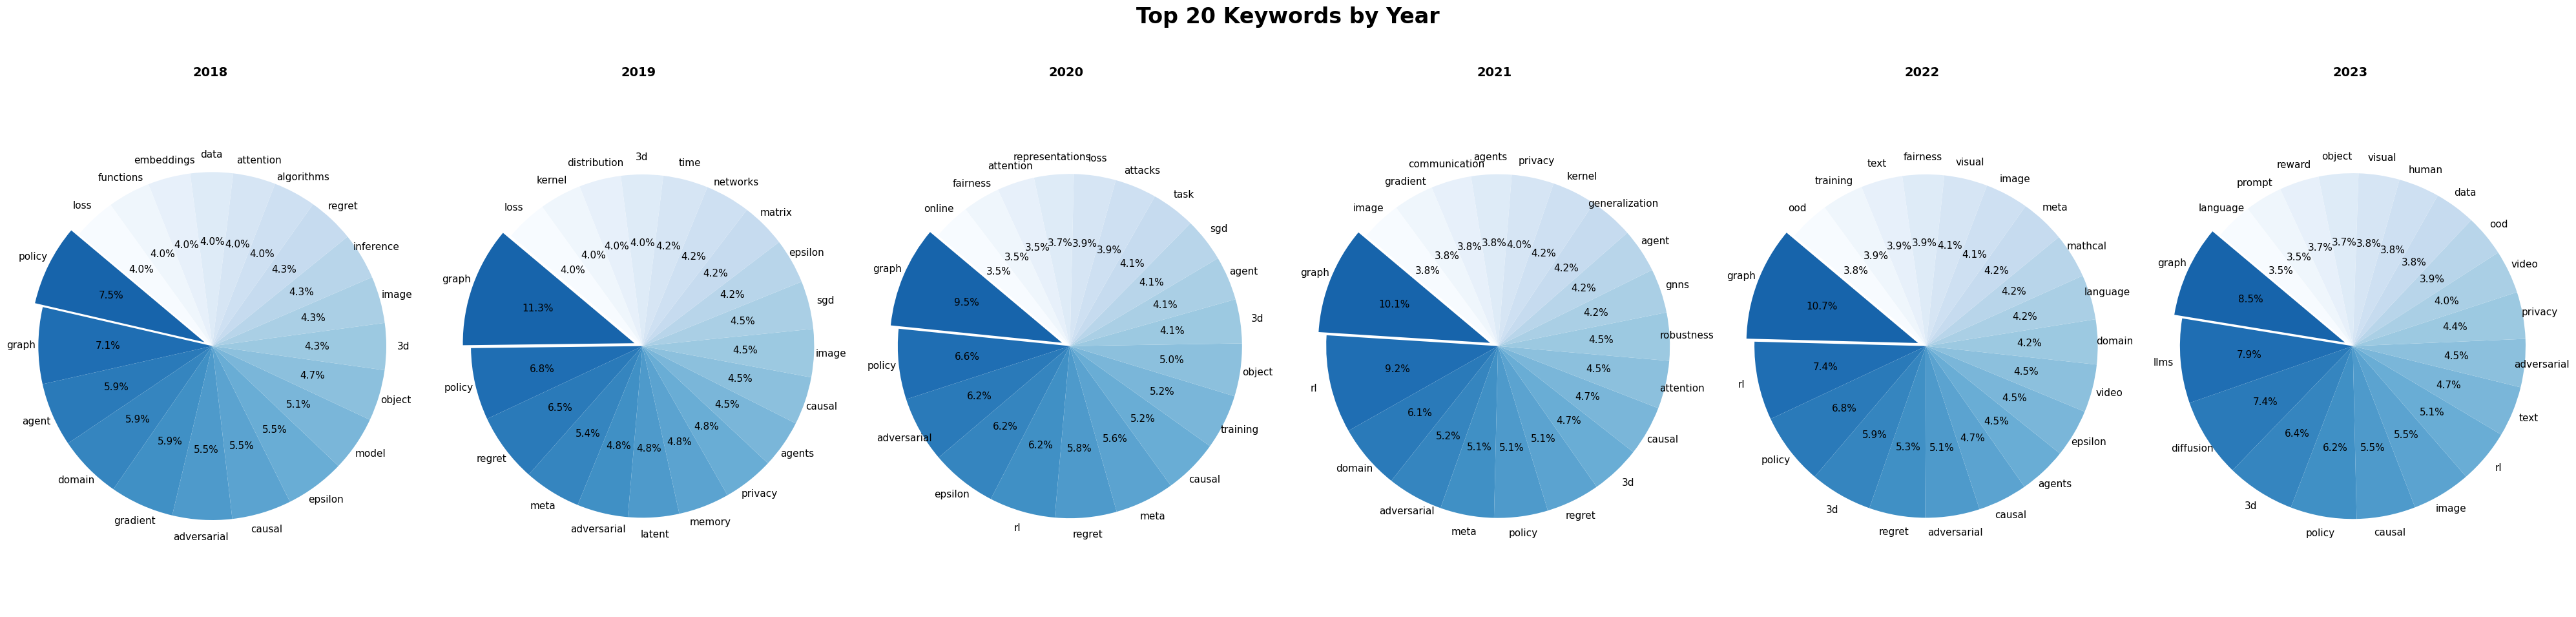

In [11]:
# top k 설정
TOP_K = 20

# 연도별 top k 키워드 추출
top_keywords_year = {}
for year, keywords in key_words_dict.items():
    counter = Counter(keywords)
    top_keywords = counter.most_common(TOP_K)
    top_keywords_year[year] = top_keywords

# 그래프 설정
num_years = len(key_words_dict)
fig, axs = plt.subplots(1, num_years, figsize=(40, 10))

# 색상 설정
colors = plt.cm.tab20(range(TOP_K))  # 색상 팔레트

# 각 연도별 파이 그래프 그리기
for i, (year, top_keywords) in enumerate(top_keywords_year.items()):
    # top_keywords가 비어 있는 경우 처리
    if not top_keywords:
        labels = ['No data']
        sizes = [1]
    else:
        # 가장 많이 등장한 문자열 top k
        top_keywords = top_keywords[:k]  # 상위 k개만 사용
        labels, sizes = zip(*top_keywords)
    # labels, sizes = zip(*top_keywords)

    # 색상 gradation 생성
    # colors = plt.cm.Blues(np.linspace(0, 1, len(labels)))[::-1]
    colors = plt.cm.get_cmap('Blues_r')(np.linspace(0.2, 1, len(labels)))
    # explode = [0.1 if idx == 0 else 0 for idx in range(TOP_K)]  # 첫 번째 조각만 돌출
    explode = [0.05 if j == 0 else 0 for j in range(len(labels))]
    
    wedges, texts, autotexts = axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=False)
    
    # 레이블 설정
    for text in texts:
        text.set_fontsize(11)
        text.set_rotation_mode('anchor')
        text.set_horizontalalignment('center')
        text.set_verticalalignment('center')
    for autotext in autotexts:
        autotext.set_fontsize(11)
        autotext.set_color('black')
    
    axs[i].set_title(f"{year}", fontsize=14, fontweight='bold')
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# 전체 제목 설정
plt.suptitle(f"Top {TOP_K} Keywords by Year", fontsize=24, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 레이아웃 조정

# 그래프 출력
plt.savefig(f"top_{k}_keywords_by_year.jpg", dpi=300, bbox_inches='tight')
plt.show()

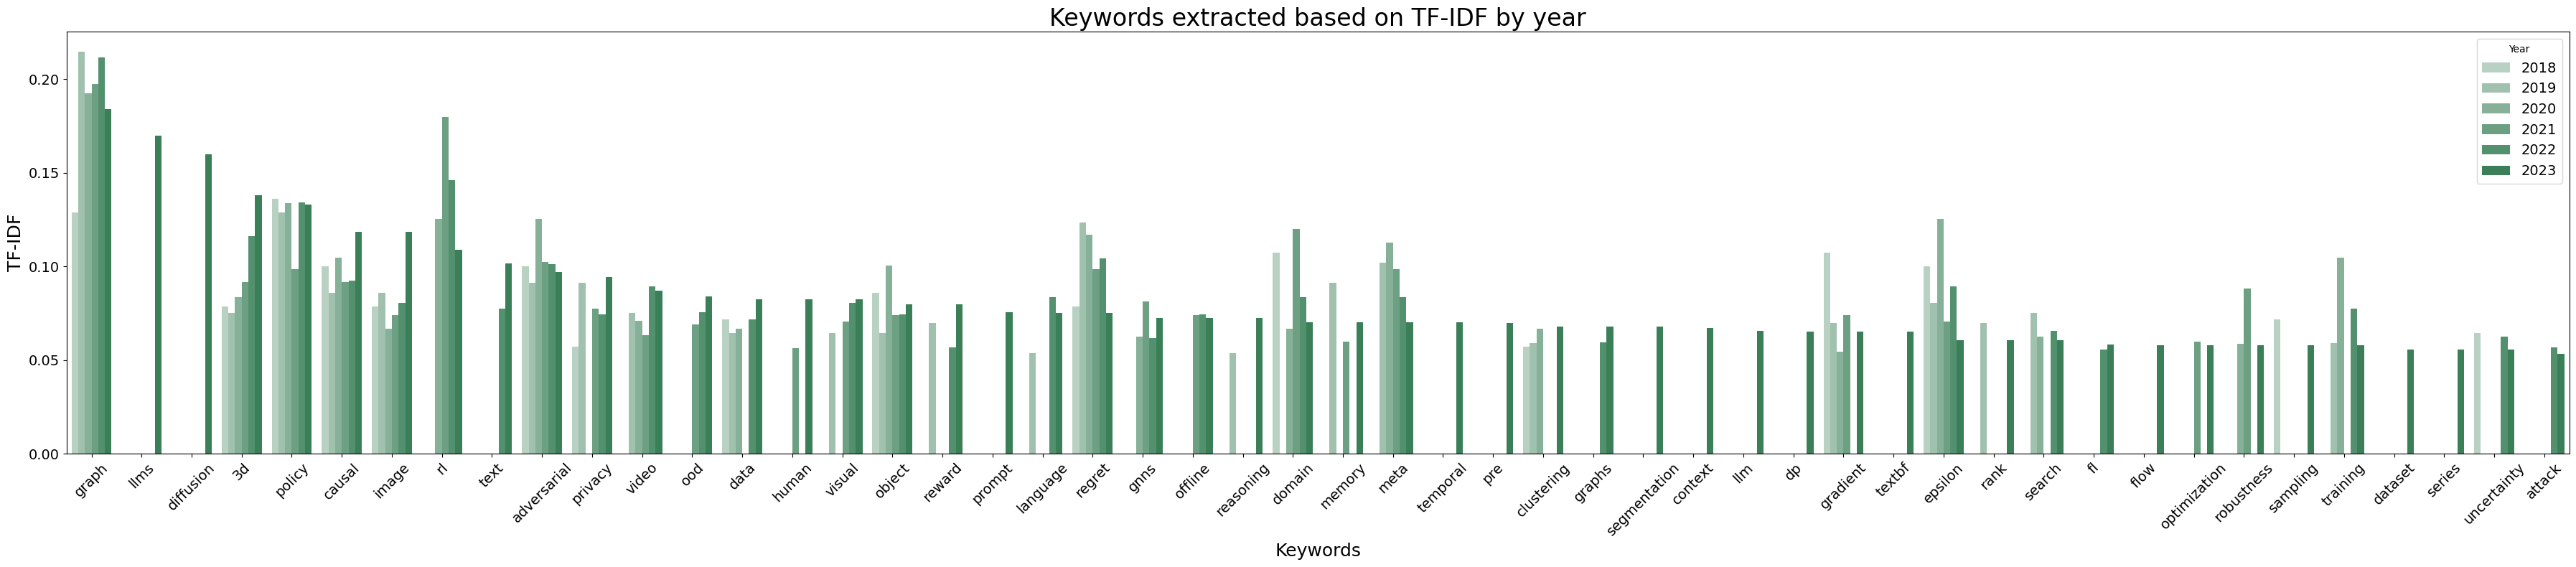

In [12]:
sorting_standard = "2023"
topk = 100

# Sorting keywords based on 2023 data
keywords_sorted = sorted(key_words_dict[sorting_standard], key=key_words_dict[sorting_standard].get, reverse=True)
top_keywords = keywords_sorted[:topk]

# Creating a DataFrame for Seaborn plotting
data = {'Year': [], 'Keyword': [], 'TF-IDF': []}
for year, year_data in key_words_dict.items():
    for keyword in top_keywords:
        data['Year'].append(year)
        data['Keyword'].append(keyword)
        data['TF-IDF'].append(year_data.get(keyword, 0))

df = pd.DataFrame(data)

# Generate a color palette
palette = sns.light_palette("seagreen", reverse=True, n_colors=8)[:len(key_words_dict)][::-1]

# Plotting with Seaborn
plt.figure(figsize=(36, 8))
sns.barplot(x='Keyword', y='TF-IDF', hue='Year', data=df, palette=palette)
plt.title(f'Keywords extracted based on TF-IDF by year', fontsize=24)
plt.xlabel('Keywords', fontsize=18)
plt.ylabel('TF-IDF', fontsize=18)
plt.xticks(rotation=45, ha='center', fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.legend(title='Year', fontsize=14)
plt.savefig(f"kewords_comparison_on_{sorting_standard}.jpg", dpi=300, bbox_inches='tight')
plt.show()